In [2]:
%load_ext autoreload
%autoreload 2
from omegak import process_gbsar_data
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from collections import defaultdict
import glob
from itertools import permutations
import torchvision.transforms as transforms
import os

def concat(a,b,c):
    return np.concatenate([a,b,c],axis=1)

def save_img(img, name):
    img = np.uint8(img*255)
    pil_image= Image.fromarray(img)
    transformation = transforms.Resize((256,256))
    pil_image= transformation(pil_image)
    pil_image.save(f'{name}.png')
    
def load_imgs(img1, img2, img3):
    a = np.float32(np.load(f'data/{img1}'))
    b = np.float32(np.load(f'data/{img2}'))
    c = np.float32(np.load(f'data/{img3}'))
    a, b, c = normalize(a,b,c)
    return concat(a,b,c)

def normalize(*imgs):
    imgs_norm = []
    for img in imgs:
        img = (img-np.min(img))/(np.max(img)-np.min(img))
        imgs_norm.append(img)
    return imgs_norm

def save_all_images():
    for i in range(1,51):
        imgs = glob.glob(f'data/*_{i}.npy')
        imgs = [img[len('data/'):] for img in imgs]
        hh = sorted([img for img in imgs if img[5:7] == 'hh'], key=lambda x: int(x.split('_')[1]))
        vv = sorted([img for img in imgs if img[5:7] == 'vv'], key=lambda x: int(x.split('_')[1]))
        
        for img1, img2, img3 in permutations(hh, 3):
            first, second, third = img1.split('_')[0], img2.split('_')[0], img3.split('_')[0]
            img = load_imgs(img1, img2, img3)
            np.save(f'concat_data/{first}_{second}_{third}_{2*i}', img)
            save_img(img, f'images/{first}_{second}_{third}_{2*i}')

        for img1, img2, img3 in permutations(vv, 3):
            first, second, third = img1.split('_')[0], img2.split('_')[0], img3.split('_')[0]
            img = load_imgs(img1, img2, img3)
            np.save(f'concat_data/{first}_{second}_{third}_{2*i-1}', img)
            save_img(img, f'images/{first}_{second}_{third}_{2*i-1}')

In [3]:
id = 15
glob.glob(f"data/*_{id}.npy")

['data/AR_3_hh_15.npy',
 'data/AS_1_vv_15.npy',
 'data/GS_2_vv_15.npy',
 'data/GS_2_hh_15.npy',
 'data/AS_1_hh_15.npy',
 'data/AR_3_vv_15.npy']

In [4]:
glob.glob(f"images/*_{id*2}.png")

['images/AR_AS_GS_30.png',
 'images/AR_GS_AS_30.png',
 'images/GS_AS_AR_30.png',
 'images/AS_AR_GS_30.png',
 'images/AS_GS_AR_30.png',
 'images/GS_AR_AS_30.png']

 
** GBSAR parameters **
Step size:  1.0  cm
Number of steps:  60
Total aperture:  0.6  m
Number of chirp samples:  1024
Central frequency:  24.0  GHz
Bandwidth:  1300.0 MHz


/lustre/home/lmucko/diffusion/omegak.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  data[index] = ifft(remove_low_freq)


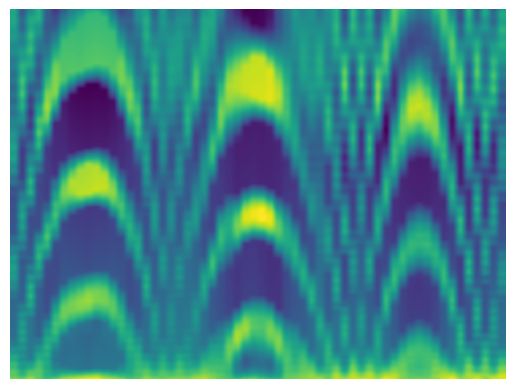

In [5]:
img1 = "AS_1_vv_15.npy"
img2 = "GS_2_vv_15.npy"
img3 = "AR_3_vv_15.npy"
img = load_imgs(img1, img2, img3)
plt.imshow(img, aspect='auto')
plt.axis('off')
radar_image_og = process_gbsar_data(img)

(-0.5, 179.5, 39.5, -0.5)

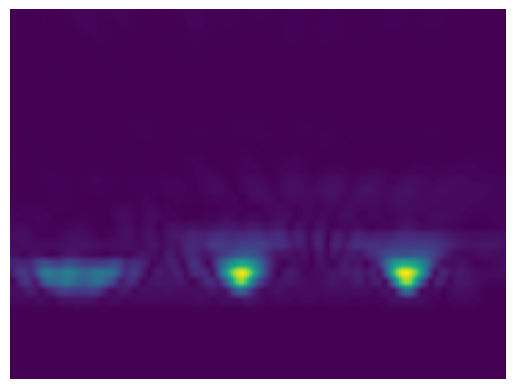

In [6]:
plt.imshow(np.abs(radar_image_og), aspect='auto')
plt.axis('off')

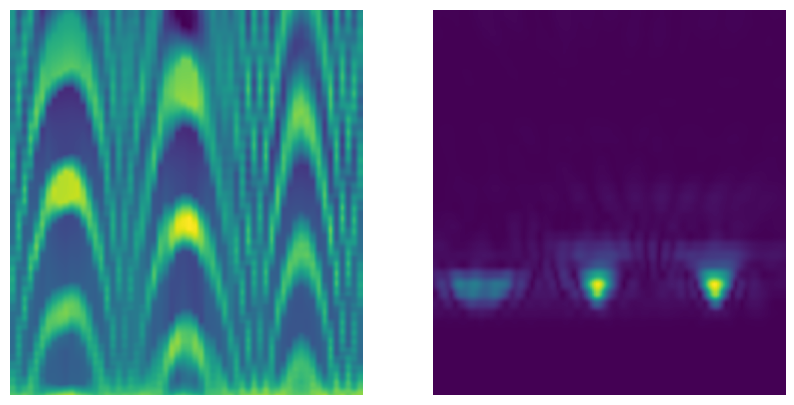

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original (og) image
axs[0].imshow(img, aspect='auto')
axs[0].axis('off')

# Plot the radar image
axs[1].imshow(np.abs(radar_image_og), aspect='auto')
axs[1].axis('off')

# Display the plot
plt.show()

 
** GBSAR parameters **
Step size:  1.0  cm
Number of steps:  60
Total aperture:  0.6  m
Number of chirp samples:  1024
Central frequency:  24.0  GHz
Bandwidth:  1300.0 MHz


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

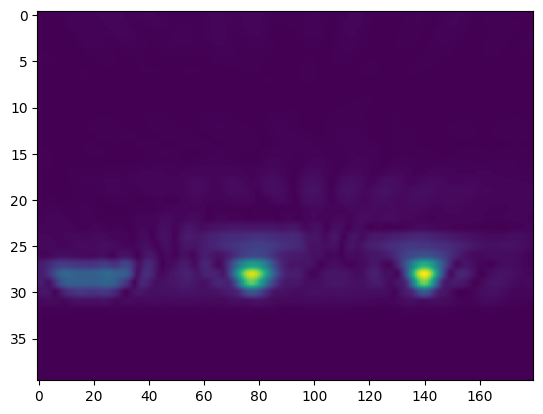

In [8]:
img_resized = Image.open(f"images/AS_GS_AR_30.png")
radar_image_resized = process_gbsar_data(img_resized)
plt.imshow(np.abs(radar_image_resized), aspect='auto')
plt.axes('off')